In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [38]:
df=pd.read_csv("/content/International_Report_Departures.csv.zip")

In [39]:
df.head()

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0,20,20


In [40]:
df.tail()

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
930803,07/01/2000,2000,7,13303,MIA,33,13605,NAS,204,20398,MQ,1,Departures,1422,0,1422
930804,04/01/2019,2019,4,13303,MIA,33,14286,PTY,162,19770,CM,0,Departures,1439,0,1439
930805,08/01/2000,2000,8,13303,MIA,33,13605,NAS,204,20398,MQ,1,Departures,1441,0,1441
930806,09/01/2004,2004,9,12266,IAH,74,15632,VSA,148,19534,AM,0,Departures,1461,0,1461
930807,05/01/1996,1996,5,12478,JFK,22,14210,POS,280,19542,BW,0,Departures,2019,0,2019


In [41]:
df.dtypes

data_dte        object
Year             int64
Month            int64
usg_apt_id       int64
usg_apt         object
usg_wac          int64
fg_apt_id        int64
fg_apt          object
fg_wac           int64
airlineid        int64
carrier         object
carriergroup     int64
type            object
Scheduled        int64
Charter          int64
Total            int64
dtype: object

In [42]:
df.isnull().sum()

data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         3055
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64

In [43]:
df=df.drop("carrier",axis=1)

In [44]:
df.isnull().sum().sum()

0

In [45]:
df.columns

Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carriergroup', 'type',
       'Scheduled', 'Charter', 'Total'],
      dtype='object')

In [46]:
df.dtypes == "O"

data_dte         True
Year            False
Month           False
usg_apt_id      False
usg_apt          True
usg_wac         False
fg_apt_id       False
fg_apt           True
fg_wac          False
airlineid       False
carriergroup    False
type             True
Scheduled       False
Charter         False
Total           False
dtype: bool

In [47]:
#Dropping the constant column
df=df.drop('type',axis=1)

In [48]:
#Sepration of columns
cat_col=[fea for fea in df.columns if df[fea].dtypes == "O"]
num_col=[fea for fea in df.columns if df[fea].dtypes != "O"]

In [49]:
cat_col

['data_dte', 'usg_apt', 'fg_apt']

In [50]:
num_col

['Year',
 'Month',
 'usg_apt_id',
 'usg_wac',
 'fg_apt_id',
 'fg_wac',
 'airlineid',
 'carriergroup',
 'Scheduled',
 'Charter',
 'Total']

In [51]:
#label_encoding
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [61]:
for fea in cat_col:

  df[fea]=label_encoder.fit_transform(df[fea])

In [62]:
df.head()

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
0,139,2006,5,12016,366,5,13162,783,844,20177,1,0,10,10
1,136,2003,5,10299,36,1,13856,979,736,20007,1,0,15,15
2,79,2007,3,10721,113,13,12651,642,439,20402,1,0,1,1
3,347,2004,12,11259,203,74,16271,1639,936,20201,1,0,1,1
4,142,2009,5,13303,572,33,11075,276,219,21323,0,0,20,20


In [63]:
df.tail()

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
930803,193,2000,7,13303,572,33,13605,909,204,20398,1,1422,0,1422
930804,122,2019,4,13303,572,33,14286,1086,162,19770,0,1439,0,1439
930805,223,2000,8,13303,572,33,13605,909,204,20398,1,1441,0,1441
930806,257,2004,9,12266,418,74,15632,1425,148,19534,0,1461,0,1461
930807,129,1996,5,12478,452,22,14210,1068,280,19542,0,2019,0,2019


In [64]:
#Feature Scaling
#Min-Max Scaler Function

In [71]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler=MinMaxScaler()

In [78]:
df1=pd.DataFrame(df,columns=num_col)


In [79]:
df1

,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
0,2006,5,12016,5,13162,844,20177,1,0,10,10
1,2003,5,10299,1,13856,736,20007,1,0,15,15
2,2007,3,10721,13,12651,439,20402,1,0,1,1
3,2004,12,11259,74,16271,936,20201,1,0,1,1
4,2009,5,13303,33,11075,219,21323,0,0,20,20
...,...,...,...,...,...,...,...,...,...,...,...
930803,2000,7,13303,33,13605,204,20398,1,1422,0,1422
930804,2019,4,13303,33,14286,162,19770,0,1439,0,1439
930805,2000,8,13303,33,13605,204,20398,1,1441,0,1441
930806,2004,9,12266,74,15632,148,19534,0,1461,0,1461


In [82]:
X=df1.iloc[:,[2,3]]

In [83]:
y=df1.iloc[:,5]

In [85]:
y.head()

0    844
1    736
2    439
3    936
4    219
Name: fg_wac, dtype: int64

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=50)

In [87]:
X_train.head()

,usg_apt_id,usg_wac
97896,12306,41
428149,15024,4
91543,12339,42
813214,12892,91
351538,15096,22


In [130]:
scaler=MinMaxScaler().fit(X_train)

In [91]:
scaler.data_min_

array([1.001e+04, 1.000e+00])

In [92]:
scaler.data_max_

array([9.9999e+04, 9.3000e+01])

In [93]:
X_train.describe()

,usg_apt_id,usg_wac
count,698106.000000,698106.000000
mean,12808.836923,42.515025
std,2698.195037,27.572118
min,10010.000000,1.000000
25%,11618.000000,22.000000
50%,12892.000000,33.000000
75%,13487.000000,72.000000
max,99999.000000,93.000000


In [94]:
scaler.feature_range

(0, 1)

In [96]:
X_train_scaled=scaler.transform(X_train)

In [97]:
print(X_train_scaled)

[[0.02551423 0.43478261]
 [0.05571792 0.0326087 ]
 [0.02588094 0.44565217]
 ...
 [0.00430053 0.35869565]
 [0.03230395 0.4673913 ]
 [0.02742557 0.22826087]]


In [101]:
scaler=MinMaxScaler().fit(X_test)

In [102]:
scaler.data_min_

array([1.0044e+04, 1.0000e+00])

In [105]:
scaler.data_max_

array([9.9999e+04, 9.3000e+01])

In [106]:
X_test_scaled=scaler.transform(X_test)

In [107]:
print(X_test_scaled)

[[0.04508921 0.23913043]
 [0.00764827 0.02173913]
 [0.05459396 0.04347826]
 ...
 [0.03557334 0.57608696]
 [0.04533378 0.23913043]
 [0.04170974 0.97826087]]


In [108]:
scaler.feature_range

(0, 1)

In [109]:
 #correlationAnalysis

In [113]:
df1.corr()

,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
Year,1.000000,-0.021233,0.005048,0.065969,0.053412,0.045974,0.312519,0.022367,0.069213,-0.052756,0.062673
Month,-0.021233,1.000000,-0.000944,-0.001765,-0.000760,0.017482,-0.004098,-0.007390,0.013036,-0.007488,0.012140
usg_apt_id,0.005048,-0.000944,1.000000,0.069199,0.030126,-0.002550,0.050586,-0.008993,-0.022789,0.000585,-0.022939
usg_wac,0.065969,-0.001765,0.069199,1.000000,0.096134,-0.043867,-0.004251,-0.050752,0.041788,-0.024382,0.038864
fg_apt_id,0.053412,-0.000760,0.030126,0.096134,1.000000,0.505629,0.076175,-0.002074,0.082709,-0.027337,0.079792
fg_wac,0.045974,0.017482,-0.002550,-0.043867,0.505629,1.000000,-0.002809,-0.148620,0.109073,-0.039502,0.104752
airlineid,0.312519,-0.004098,0.050586,-0.004251,0.076175,-0.002809,1.000000,0.116642,-0.144813,0.081447,-0.135098
carriergroup,0.022367,-0.007390,-0.008993,-0.050752,-0.002074,-0.148620,0.116642,1.000000,-0.026875,0.040866,-0.021539
Scheduled,0.069213,0.013036,-0.022789,0.041788,0.082709,0.109073,-0.144813,-0.026875,1.000000,-0.141007,0.990733
Charter,-0.052756,-0.007488,0.000585,-0.024382,-0.027337,-0.039502,0.081447,0.040866,-0.141007,1.000000,-0.005234


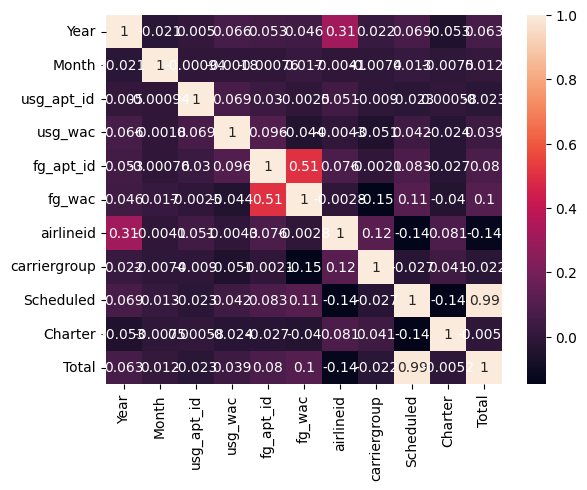

In [120]:
import seaborn as sns
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [165]:
 #Feature Selection
 from sklearn.linear_model import LinearRegression

In [166]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=8)

In [150]:
clf=LinearRegression()

In [153]:
baseline=clf.fit(X_train,y_train)
from sklearn.feature_selection import SelectKBest

In [169]:
select_feature=SelectKBest(k='all').fit(X_train,y_train)